codigo.py

In [6]:
from ultralytics import YOLO
import cv2
import numpy as np
import json
import os
from numpy import savetxt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.path as mpath


def actualiza_mapa(matriz, frame):
    results= model.predict(frame)
    for result in results: 
        for mask, box in zip(result.masks.xy, result.boxes):
            points = np.int32([mask])
            color_number = classes_ids.index(int(box.cls[0]))
            cv2.polylines(frame, points, True, colors[color_number], 1)
            cv2.fillPoly(frame, points, colors[color_number])

            # Crear la máscara booleana
            height, width = matriz.shape
            x, y = np.meshgrid(np.arange(width), np.arange(height))
            x, y = x.flatten(), y.flatten()
            points_grid = np.vstack((x, y)).T

            path = mpath.Path(points[0])
            mask = path.contains_points(points_grid).reshape((height, width))

            # Sumar el valor a las celdas dentro de la polilínea
            matriz[mask] += color_number

movement.py

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


# Función para verificar si una posición es válida
def is_valid_move(heatmap, new_positions):
    rows, cols = heatmap.shape
    for (r, c) in new_positions:
        if r < 0 or r >= rows or c < 0 or c >= cols or heatmap[r, c] in [0, 4, 5, 6]:
            return False
    return True

# Función para obtener un fotograma
def obtener_fotograma(video_path, numero_fotograma):
    """
    Obtiene un fotograma específico de un archivo de video.
    
    Args:
        video_path (str): Ruta al archivo de video.
        numero_fotograma (int): Número del fotograma que se desea obtener (empezando desde 0).
    
    Returns:
        frame (numpy.ndarray): El fotograma solicitado, o None si no se puede leer el fotograma.
    """
    # Abrir el archivo de video
    cap = cv2.VideoCapture(video_path)
    
    # Verificar si el video se abrió correctamente
    if not cap.isOpened():
        print(f"Error al abrir el archivo de video: {video_path}")
        return None
    
    # Establecer la posición del video al fotograma deseado
    cap.set(cv2.CAP_PROP_POS_FRAMES, numero_fotograma)
    
    # Leer el fotograma
    ret, frame = cap.read()
    frame = cv2.resize(frame, (480,640))
    
    # Liberar el objeto VideoCapture
    cap.release()
    
    if not ret:
        print(f"Error al leer el fotograma número {numero_fotograma}")
        return None
    
    return frame

# Función para mover el robot
# Variables globales para almacenar la dirección de movimiento anterior
ultima_direccion = None

def move_robot(heatmap, robot_legs):
    global izquierda
    global derecha
    global ultima_direccion
    global orientacion_patas

    # Definir las direcciones de movimiento
    move_vector_up = (-50, 0)
    move_vector_right = (0, 50)
    move_vector_left = (0, -50)

    # Intentar mover hacia arriba
    new_positions_up = [(r + move_vector_up[0], c + move_vector_up[1]) for (r, c) in robot_legs]
    if is_valid_move(heatmap, new_positions_up):
        print("Robot moved up")
        ultima_direccion = 'up'        
        return new_positions_up

    # Si no puede moverse hacia arriba, intentar mover hacia la derecha
    if ultima_direccion != 'left':
        new_positions_right = [(r + move_vector_right[0], c + move_vector_right[1]) for (r, c) in robot_legs]
        if is_valid_move(heatmap, new_positions_right):
            print("Robot moved right")
            ultima_direccion = 'right'
            return new_positions_right

    # Si no puede moverse hacia la derecha, intentar mover hacia la izquierda
    if ultima_direccion != 'right':
        new_positions_left = [(r + move_vector_left[0], c + move_vector_left[1]) for (r, c) in robot_legs]
        if is_valid_move(heatmap, new_positions_left):
            print("Robot moved left")
            ultima_direccion = 'left'
            return new_positions_left

    # Si no puede moverse en ninguna dirección, quedarse en el lugar
    print("El movimiento está bloqueado por obstáculos.")

    return None


# Función para visualizar el mapa y la posición del robot
def visualize_map(heatmap, robot_legs):
    plt.imshow(heatmap, interpolation='nearest')
    plt.title("Mapa de Calor y Posición del Robot")
    robot_legs_array = np.array(robot_legs)
    plt.scatter(robot_legs_array[:, 1], robot_legs_array[:, 0], c='red')
    plt.show()



Ejecutar

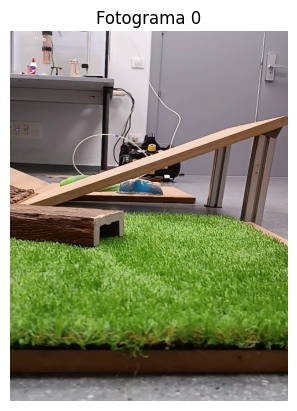


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 177.5ms
Speed: 3.4ms preprocess, 177.5ms inference, 16.1ms postprocess per image at shape (1, 3, 640, 480)
Robot moved up


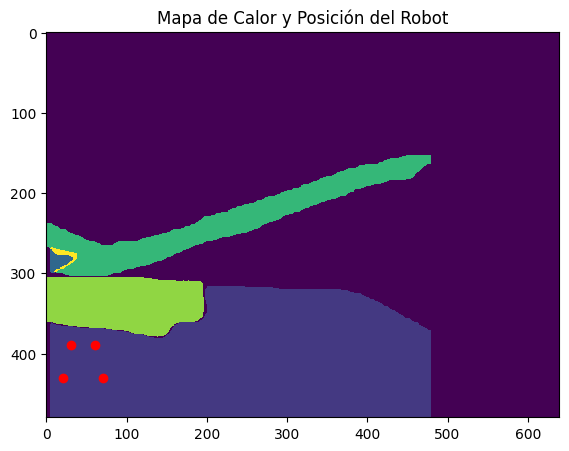

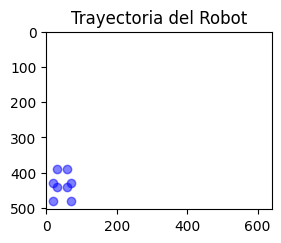

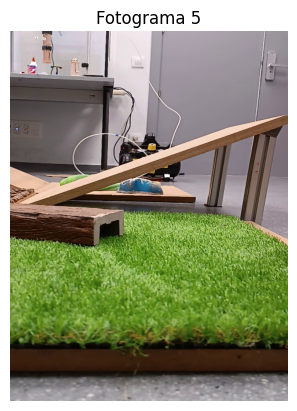


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 189.1ms
Speed: 4.5ms preprocess, 189.1ms inference, 16.0ms postprocess per image at shape (1, 3, 640, 480)
Robot moved right


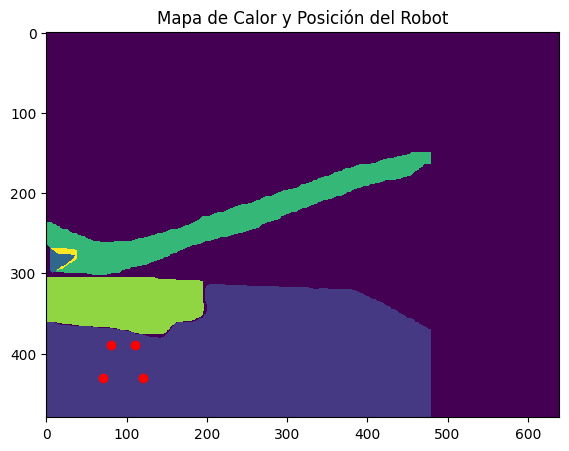

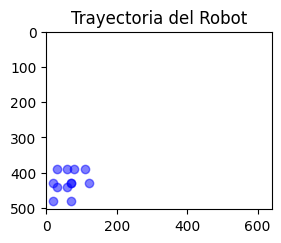

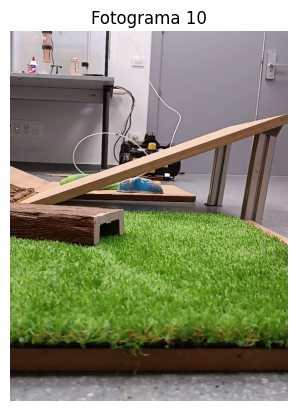


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 187.1ms
Speed: 3.6ms preprocess, 187.1ms inference, 16.6ms postprocess per image at shape (1, 3, 640, 480)
Robot moved right


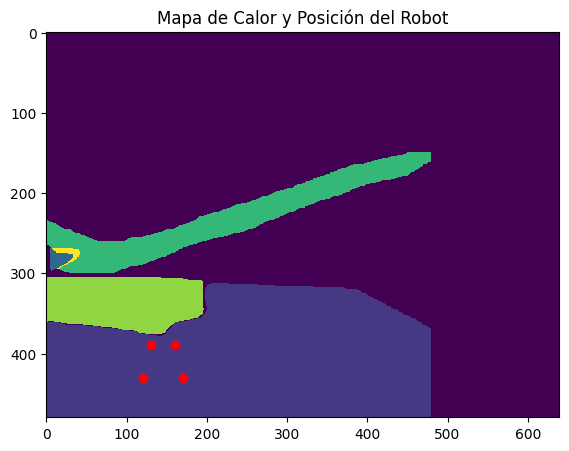

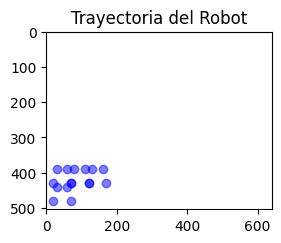

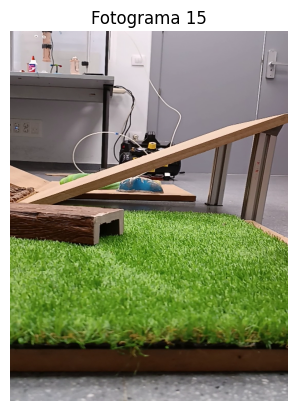


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 177.4ms
Speed: 2.5ms preprocess, 177.4ms inference, 16.5ms postprocess per image at shape (1, 3, 640, 480)
Robot moved right


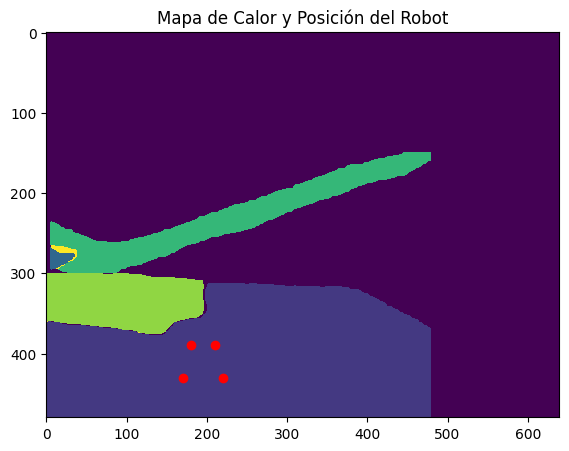

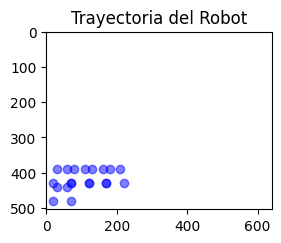

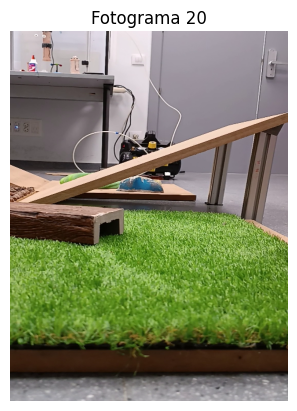


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 189.6ms
Speed: 3.0ms preprocess, 189.6ms inference, 16.2ms postprocess per image at shape (1, 3, 640, 480)
Robot moved right


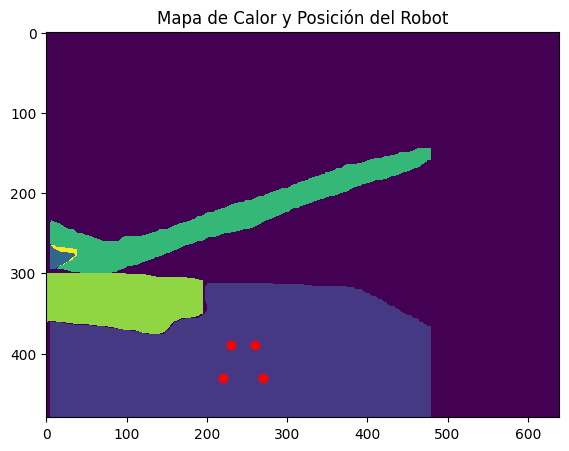

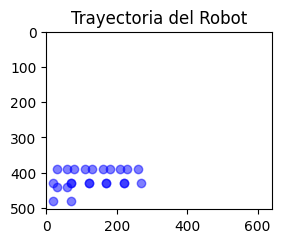

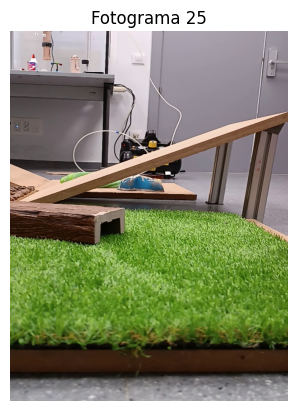


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 189.8ms
Speed: 2.7ms preprocess, 189.8ms inference, 16.4ms postprocess per image at shape (1, 3, 640, 480)
Robot moved up


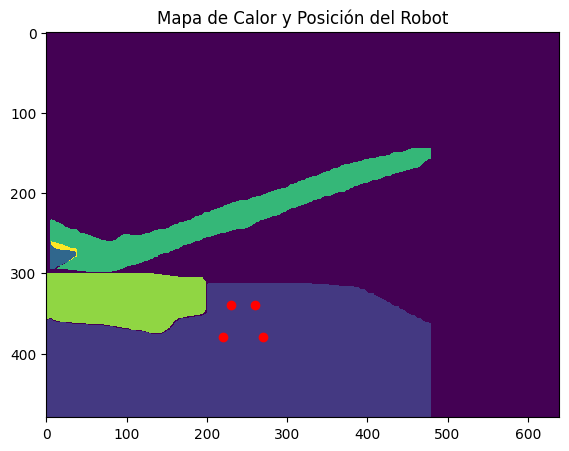

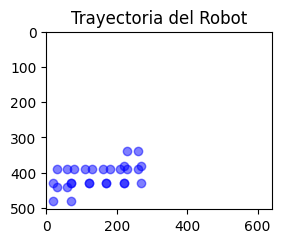

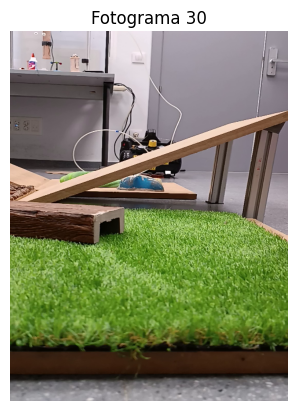


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 185.5ms
Speed: 1.8ms preprocess, 185.5ms inference, 19.3ms postprocess per image at shape (1, 3, 640, 480)
Robot moved right


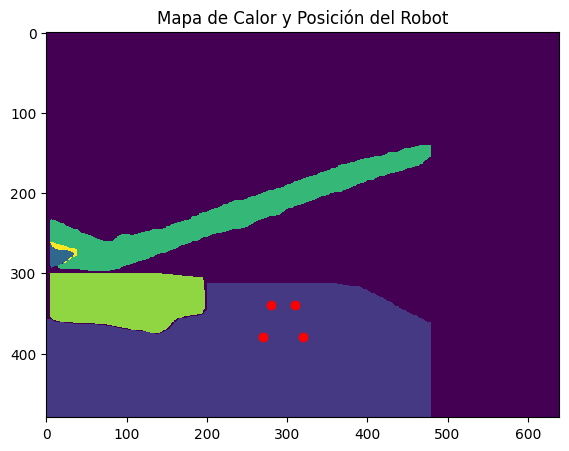

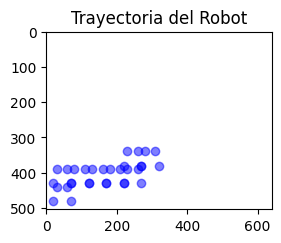

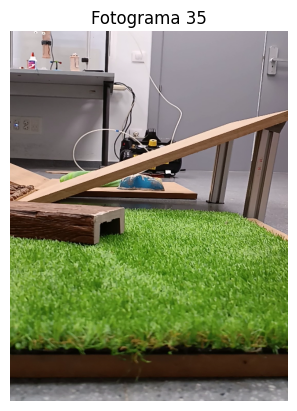


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 183.5ms
Speed: 2.7ms preprocess, 183.5ms inference, 18.5ms postprocess per image at shape (1, 3, 640, 480)
Robot moved right


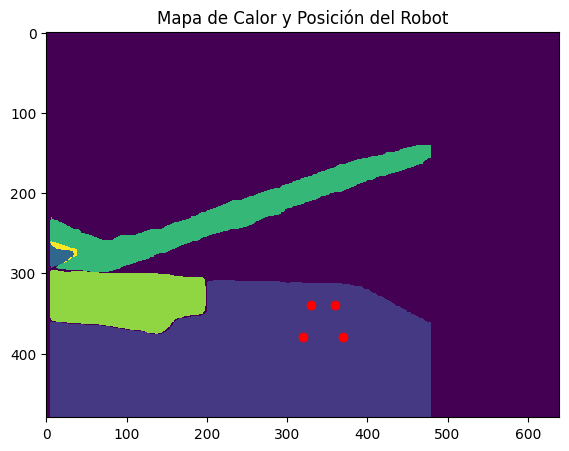

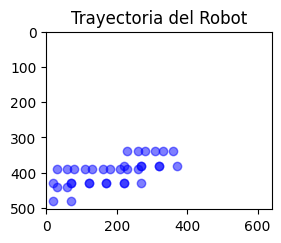

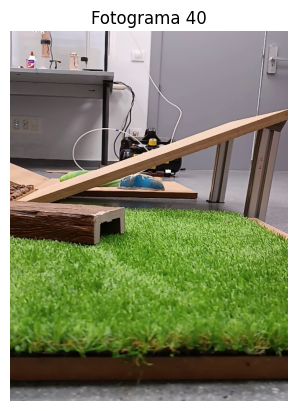


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 189.6ms
Speed: 1.6ms preprocess, 189.6ms inference, 18.9ms postprocess per image at shape (1, 3, 640, 480)
Robot moved right


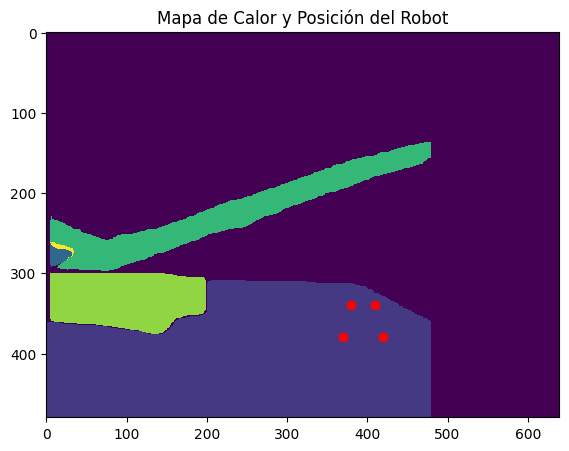

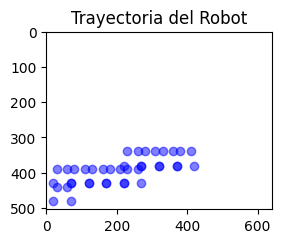

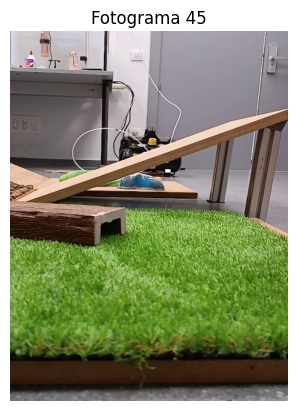


0: 640x480 4 Fondos, 1 Grass, 1 Grava, 1 NS, 1 S50, 219.6ms
Speed: 3.4ms preprocess, 219.6ms inference, 20.9ms postprocess per image at shape (1, 3, 640, 480)
El movimiento está bloqueado por obstáculos.
Cambiar posición del robot


In [8]:
#se carga el modelo entrenado
model= YOLO("./best.pt")
colors = []
# if you want all classes
yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

colors = [
    (255, 0, 0),     # Rojo
    (0, 255, 0),     # Verde
    (0, 0, 255),     # Azul
    (255, 255, 0),   # Amarillo
    (0, 255, 255),   # Cian
    (255, 0, 255),   # Magenta
    (192, 192, 192), # Gris
    (255, 165, 0),   # Naranja
    (128, 0, 128),   # Púrpura
    (0, 128, 0)      # Verde oscuro
]

# Coordenadas iniciales de las patas del robot
robot_legs = [(480, 20), (440, 30), (480, 70), (440, 60)]
all_positions = []
all_positions.append(robot_legs)
izquierda=0
derecha=0
ultima_direccion=None
orientacion_patas='vertical'
# Simulación del movimiento del robot basado en la actualización del mapa de calor
directions = ['up', 'right', 'down', 'left']
current_direction_index = 0
videopath = "./tfg_maria.mp4"
capture=cv2.VideoCapture("./tfg_maria.mp4")
fotograma = 0

for step in range(25):  # Simula 25 pasos del robot
    # Actualizar el mapa de calor desde la cámara
    imagen = obtener_fotograma(videopath, fotograma)
    
    # Mostrar la imagen
    fotograma_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    plt.imshow(fotograma_rgb)
    plt.axis('off')
    plt.title(f"Fotograma {fotograma}")
    plt.show()
    
    heatmap = np.zeros((480, 640), dtype=int)
    actualiza_mapa(heatmap, imagen)
        
    # Mover el robot
    new_positions = move_robot(heatmap, robot_legs)
    if new_positions is None:
            # Mostrar mensaje
            print("Cambiar posición del robot")
            # Salir del bucle principal
            break

    # Actualizar la posición del robot
    robot_legs = new_positions

    all_positions.append(robot_legs.copy())

    # Visualizar el mapa, la nueva posición del robot y la trayectoria
    plt.figure(figsize=(15, 5))
    
    # Mostrar el mapa de calor
    plt.subplot(1, 2, 1)
    # Visualizar el mapa y la nueva posición del robot
    visualize_map(heatmap, robot_legs)
    
    # Mostrar la trayectoria del robot sobre fondo blanco
    plt.subplot(1, 2, 2)
    plt.imshow(np.ones((480, 640, 3)))  # Fondo blanco
    for step_positions in all_positions:
        for leg in step_positions:
            plt.plot(leg[1], leg[0], 'bo', alpha=0.5)  # marcamos las trayectorias de las patas del robot
    plt.title("Trayectoria del Robot")
    
    plt.show()
    
    # Cambiar la dirección para la próxima iteración (esto es solo un ejemplo)
    current_direction_index = (current_direction_index + 1) % len(directions)
    
    # Verificar condición de parada
    if(robot_legs[3][0] <= 50 and robot_legs[3][1] >= 590):
        print("El robot ha acabado")
        break

    # Incrementar el fotograma a razón de 20 cada paso de robot
    fotograma += 5